### Setup

In [216]:
using Statistics, LinearAlgebra, CSV, DataFramesMeta
using Plots
using Printf
using RemoteREPL
@async serve_repl()

Task (failed) @0x00000139230f89c0
IOError: listen: address already in use (EADDRINUSE)
Stacktrace:
  [1] uv_error
    @ .\libuv.jl:100 [inlined]
  [2] #listen#13
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:628 [inlined]
  [3] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:627 [inlined]
  [4] #listen#10
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:621 [inlined]
  [5] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:618 [inlined]
  [6] #listen#12
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [7] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [

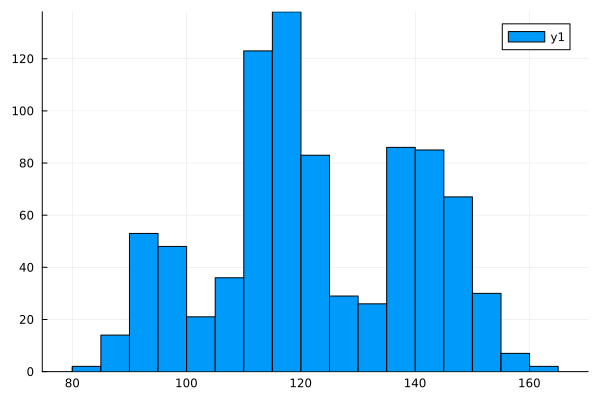

In [217]:
data = CSV.read("Results.csv", DataFrame)
data = data[data[!,2] .> 50, :]
histogram(data[:, 2])

In [218]:
data[:,2] |> median

119.0

# First runs

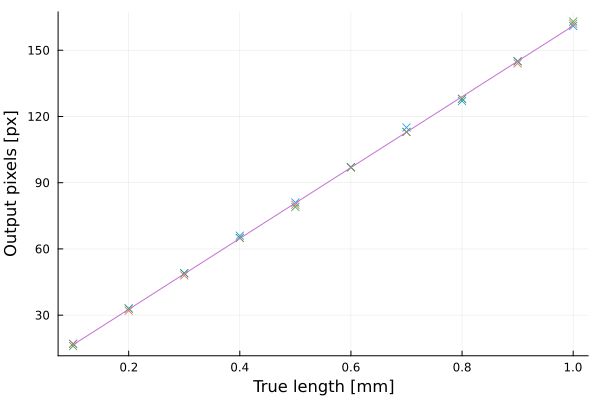

In [219]:
strs = [string("data\\",i,".",j,".csv") for i in 1:4 for j in 1:2]
data = CSV.read.(strs, DataFrame)


xs = truelength = ((0.1:0.1:1) |> collect)
ys = calibration = [
    17  17  16;
    33  32  33;
    49  48  49;
    66  65  65;
    81  80  79;
    97  97  97;
    115 113 113;
    127 128 128;
    145 144 145;
    161 162 163
]

β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True length [mm]",
    ylabel = "Output pixels [px]"
)
plot!(xs, (xs*β_1 .+ β_0))

In [220]:

cehck = (data[1][:,2] .>= 0) .&& (data[1][:,2] .<5)
histogram(data[1][:,2])
quantile.([data[8][:,2]], 0.0:0.1:1)
data[1]
for i in 1:8
    sort!(data[i], "Area")
    data[i][:,2] .*= 1/β_1^2
end


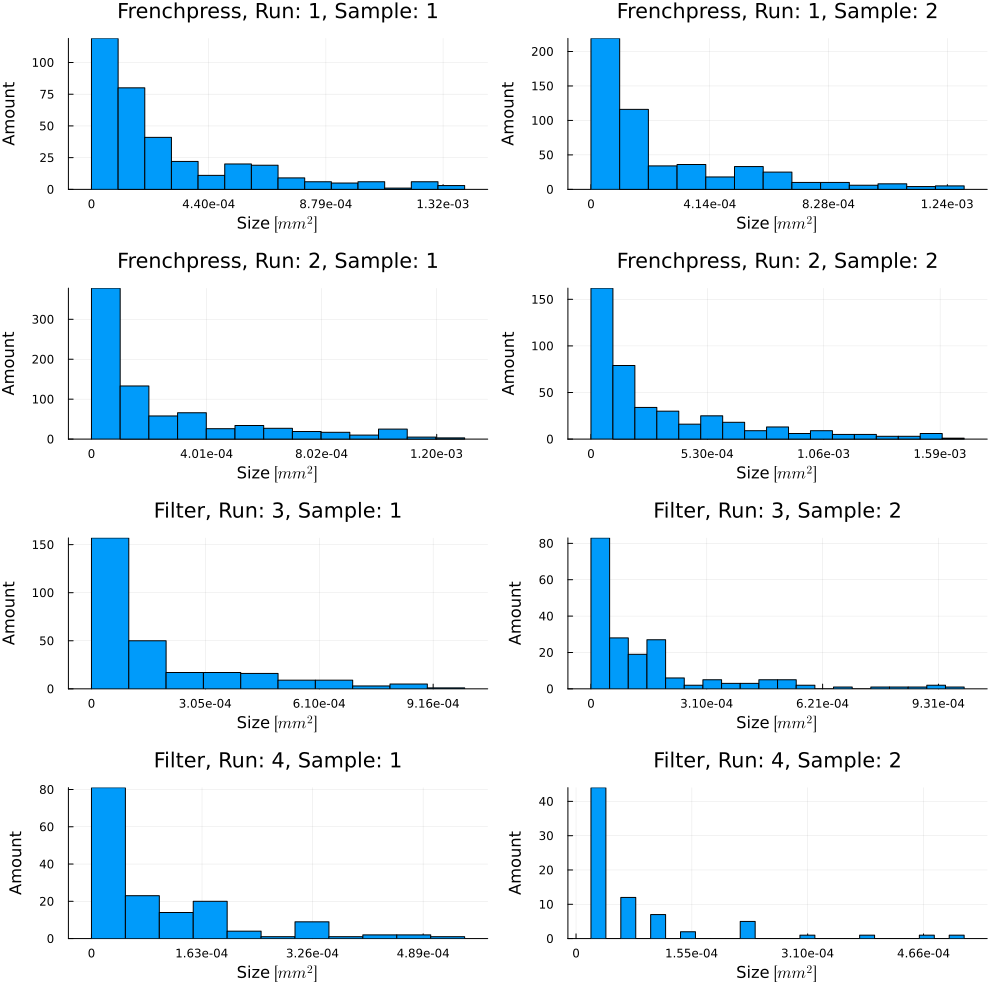

In [221]:
runs = ["Frenchpress", "Frenchpress", "Filter", "Filter"]
sample = [-(i%2)+2 for i in 1:8]
run = [i÷2 for i in 2:9]
plts = [histogram(
        data[i][1:findfirst(
            x -> x > quantile(data[i][:, 2], 0.9), 
            data[i][:, 2]
        ), 2],
        xticks=(
            [
            quantile(data[i][:, 2], 0.9)*j for j in 0:(1/3):1],
            (
                [quantile(data[i][:, 2], 0.9)*j for j in (1/3):(1/3):1] 
                .|> x-> @sprintf("%.2e", x)
            ) |> x->vcat("0", x)
            ),
        legend = :none,
        title = string(runs[run[i]],", Run: ", run[i], ", Sample: ", sample[i])
    ) for i in 1:8]
# plts = [histogram(data[i][:,2]) for i in 1:8]
plot(plts..., layout=(4,2),
    size=(1000,1000),
    xlabel = "Size \$[mm^2]\$",
    ylabel = "Amount"
)


In [222]:
means = [mean(data[i][1:findfirst(
        x -> x > quantile(data[i][:, 2], 0.9), 
        data[i][:, 2]
        ), 2]
    ) for i in 1:8]
# means = [mean(data[i][:,2]
#     ) for i in 1:8]

mean(means[1:4])/mean(means[5:8])

2.0919998673444455

# Filter

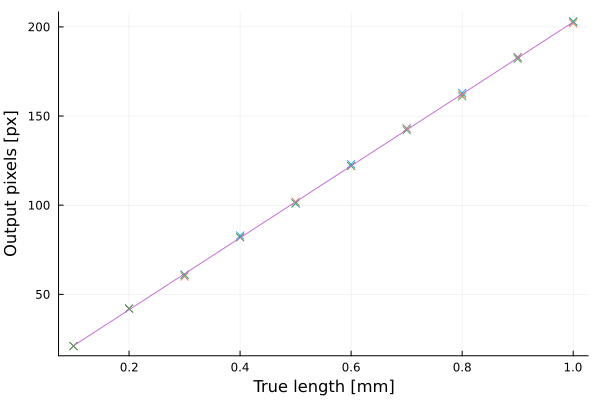

In [223]:
fstrs = [string("filter\\filter",i,".csv") for i in 1:3]
fdata = CSV.read.(fstrs, DataFrame)

xs = truelength = ((0.1:0.1:1) |> collect)
ys = calibration = [
    21  21  21;
    42  42  42; 
    61  60  61; 
    83  82  82;
    101 102 101;
    123 122 122;
    143 143 142;
    163 162 161;
    183 183 182;
    203 202 203
]

β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True length [mm]",
    ylabel = "Output pixels [px]"
)
plot!(xs, (xs*β_1 .+ β_0))

In [224]:
for i in 1:3
    sort!(fdata[i], "Area")
    fdata[i][:,2] .*= 1/β_1^2
end

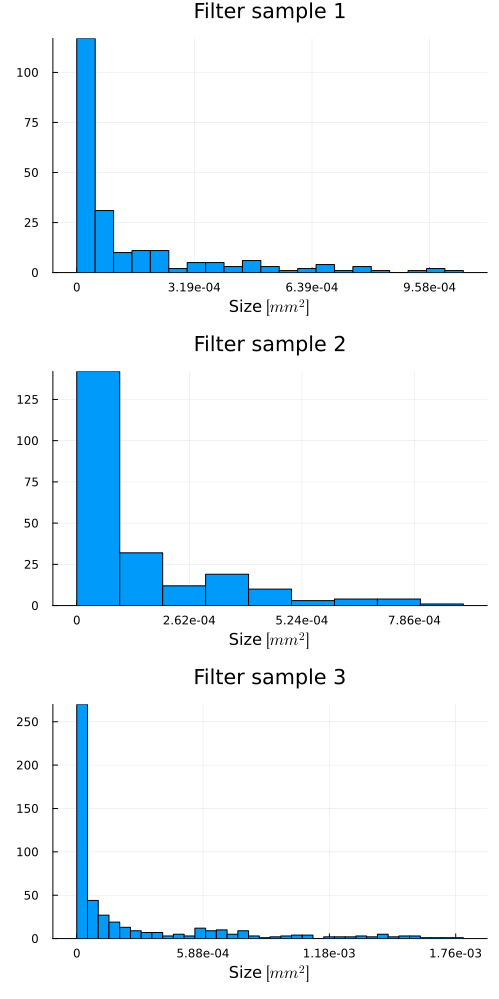

In [225]:
plts = [histogram(
        fdata[i][1:findfirst(
            x -> x > quantile(fdata[i][:, 2], 0.9), 
            fdata[i][:, 2]
        ), 2],
        xticks=(
            [
            quantile(fdata[i][:, 2], 0.9)*j for j in 0:(1/3):1],
            (
                [quantile(fdata[i][:, 2], 0.9)*j for j in (1/3):(1/3):1] 
                .|> x-> @sprintf("%.2e", x)
            ) |> x->vcat("0", x)
            ),
        legend = :none,
        title = "Filter sample $i"
    ) for i in 1:3]
# plts = [histogram(fdata[i][:,2]) for i in 1:3]
plot(plts..., layout=(3,1),
    size=(500,1000),
    xlabel = "Size \$[mm^2]\$",
    ylabel = "Amount"
)

# Last runs

In [226]:
grdstrs =  ["grinds\\$i" for i in cd(readdir, "grinds") if occursin(".csv", i)]
spntstrs = ["SCG\\$i" for i in cd(readdir, "SCG") if occursin(".csv", i)]
grdata = CSV.read.(grdstrs, DataFrame)
spntdata = CSV.read.(spntstrs, DataFrame)

10-element Vector{DataFrame}:
 1196×21 DataFrame
  Row │        Area     Mean     StdDev   Min    Max    Perim.   Circ.    Fere ⋯
      │ Int64  Float64  Float64  Float64  Int64  Int64  Float64  Float64  Floa ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     1     10.0  148.7      9.499    135    164   11.899    0.887    5. ⋯
    2 │     2    163.0  124.399   25.373     68    164   97.64     0.215   31.
    3 │     3     14.0  158.929    2.999    152    163   20.971    0.4      7.
    4 │     4      5.0  159.0      6.481    149    164    9.899    0.641    4.
    5 │     5      3.0  159.0      6.928    151    163    7.657    0.643    3. ⋯
    6 │     6     97.0  132.351   20.906     85    162   49.456    0.498   18.
    7 │     7      1.0  161.0      0.0      161    161    2.828    1.0      1.
    8 │     8      8.0  150.75     5.445    143    159   12.728    0.621    5.
  ⋮   │   ⋮       ⋮        ⋮        ⋮       ⋮      ⋮       ⋮        ⋮   

## Grinds

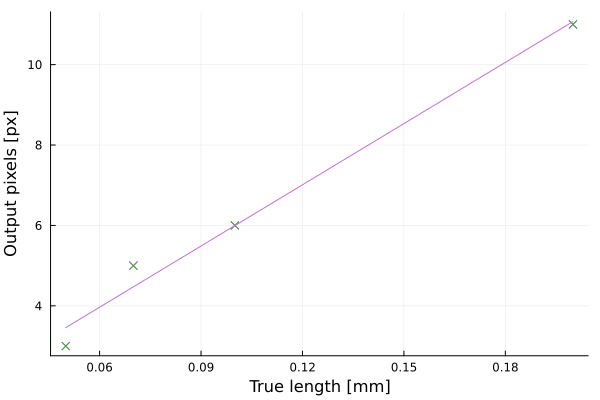

In [227]:
xs = truelength = [0.05, 0.07, 0.1, 0.2]
ys = calibration = [
    3 3 3;
    5 5 5;
    6 6 6;
    11 11 11
]

β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True length [mm]",
    ylabel = "Output pixels [px]"
)
plot!(xs, (xs*β_1 .+ β_0))

In [228]:
for i in 1:length(grdata)
    sort!(grdata[i], "Area")
    grdata[i][:,2] .*= 1/β_1^2
end

## Spent

### Mesh

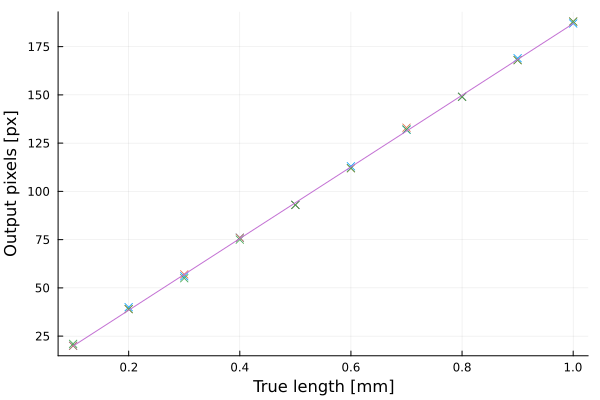

In [229]:
xs = truelength = ((0.1:0.1:1) |> collect)
ys = calibration = [
    20 20 21;
    40 39 39;
    56 57 55;
    76 76 75;
    93 93 93;
    113 112 112;
    132 133 132;
    149 149 149;
    169 168 168;
    187 188 188
]

β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True length [mm]",
    ylabel = "Output pixels [px]"
)
plot!(xs, (xs*β_1 .+ β_0))

#### Exlude wrong

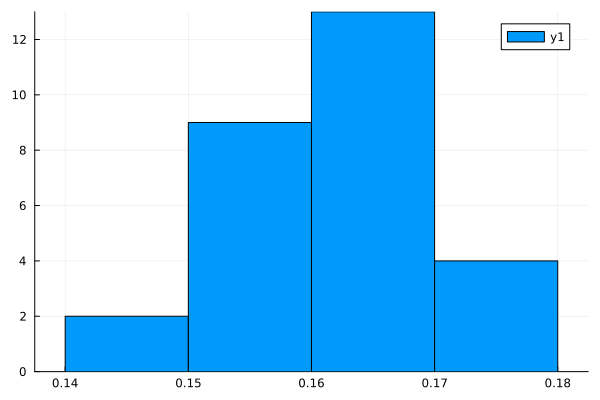

In [265]:
meshdata = CSV.read("SCG\\mesh\\mesh.csv", DataFrame)

sort!(meshdata, "Area")
meshdata = meshdata[meshdata[:,2] .> 1500, :]
meshdata[:,2] .*= 1/β_1^2
histogram(meshdata[:,2],
    title = "Mesh hole size",
    xlabel = "Size \$[mm^2]\$",
    ylabel = "Amount"
    
)
# mean(meshdata[:,2])

### Gounds

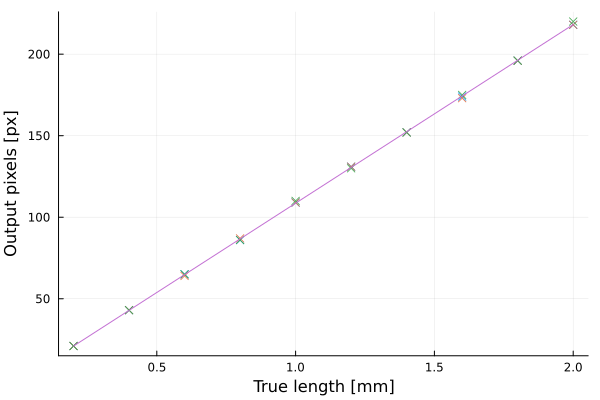

In [231]:
xs = truelength = ((0.2:0.2:2) |> collect)
ys = calibration = [
    21 21 21;
    43 43 43;
    65 64 65;
    86 87 86;
    109 109 110;
    131 131 130;
    152 152 152;
    174 173 175;
    196 196 196;
    218 218 220
]

β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True length [mm]",
    ylabel = "Output pixels [px]"
)
plot!(xs, (xs*β_1 .+ β_0))

In [232]:
for i in 1:length(spntdata)
    sort!(spntdata[i], "Area")
    spntdata[i][:,2] .*= 1/β_1^2
end

## Plots

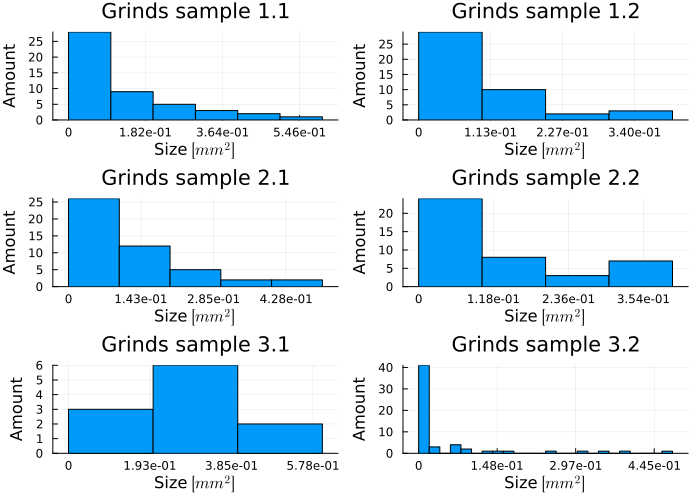

In [245]:
plts = [histogram(
        grdata[i][1:findfirst(
            x -> x > quantile(grdata[i][:, 2], 0.9),
            grdata[i][:, 2]
        ), 2],
        xticks=(
            [
            quantile(grdata[i][:, 2], 0.9)*j for j in 0:(1/3):1],
            (
                [quantile(grdata[i][:, 2], 0.9)*j for j in (1/3):(1/3):1] 
                .|> x-> @sprintf("%.2e", x)
            ) |> x->vcat("0", x)
            ),
        legend = :none,
        title = "Grinds sample $(grdstrs[i][14:16])"
    ) for i in 1:length(grdata)]
# plts = [histogram(grdata[i][:,2]) for i in 1:length(grdata)]
plot(plts..., layout=(3,2),
    size=(700,500),
    xlabel = "Size \$[mm^2]\$",
    ylabel = "Amount"
)

In [264]:
grindmeans = [mean(i[1:findfirst(
    x -> x > quantile(i[:, 2], 0.9),
    i[:, 2]
),2]) for i in grdata]
# grindmeans = [mean(i[:,2]) for i in grdata]
grindmeans = reshape(grindmeans, (3,2))
mean(grindmeans, dims=2)

3×1 Matrix{Float64}:
 0.11727036305441244
 0.17955912208504798
 0.08288324600680133

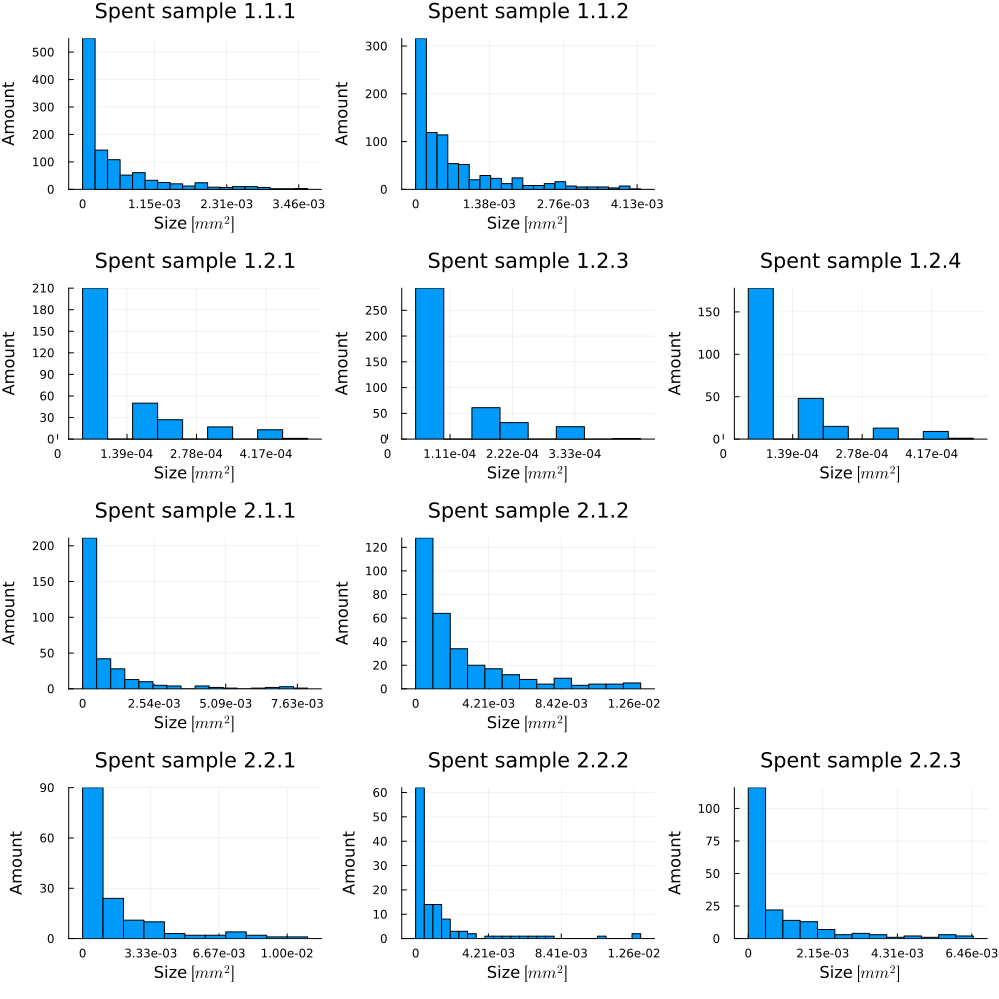

In [255]:
plts = [histogram(
        spntdata[i][1:findfirst(
            x -> x > quantile(spntdata[i][:, 2], 0.9),
            spntdata[i][:, 2]
        ), 2],
        xticks=(
            [
            quantile(spntdata[i][:, 2], 0.9)*j for j in 0:(1/3):1],
            (
                [quantile(spntdata[i][:, 2], 0.9)*j for j in (1/3):(1/3):1] 
                .|> x-> @sprintf("%.2e", x)
            ) |> x->vcat("0", x)
            ),
        legend = :none,
        title = "Spent sample $(spntstrs[i][9:13])"
    ) for i in 1:length(spntdata)]
# plts = [histogram(spntdata[i][:,2]) for i in 1:length(spntdata)]

l=@layout([° ° _; ° ° °; ° ° _; ° ° °])
plot(plts..., layout=l,
    size=(1000,1000),
    xlabel = "Size \$[mm^2]\$",
    ylabel = "Amount"
)